# GUC NETW 1003 Kmeans Assginmnet 

Objective: exercise is to learn how to use build and use  kmeans clustering algortrithm    

At the end of this lab you will be able to
> 1. Build and run a K-means algorithm.
> 2. Know how to evalute K-means Algorithm 
> 2. Understand the effect of the parmeters ont he perfromance of the algorithm .
> 3. Understand the effect of distance.

## 1. Wirte K means function 

import required libraries 

In [2]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons

c:\Users\yomna\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\yomna\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\Users\yomna\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


> ### 1.1. Code for the distance function 

write a function to calculate the distance between a set of cluster centroids and all the data points 

Cluster_Distances = GUC_Distance ( Cluster_Centroids, Data_points, Distance_Type) 
* The function shoud be able to handel data points with any number of features and any number of points 
* The function should be able to handle any K number of cluster centroids 
* To inrease speed do that in matrix format using numpy
* This should produce a matrix with rows equal to data points columns equal K 
* You should be able to calculate different types of Distance. In this assginmnet you are required to implement the following two 
    - Ecluidian distance
    - Pearson correlation distance
  

In [3]:
import numpy as np
import pandas as pd

# Define parameters
num_data_points = 10  # Number of data points
num_features = 5  # Number of features for each data point

# Generate random data points with multiple features
data = np.random.rand(num_data_points, num_features)

# Create column names for DataFrame
column_names = [f"Feature_{i+1}" for i in range(num_features)]

# Create DataFrame
df = pd.DataFrame(data, columns=column_names)

# Display the DataFrame
print("Generated DataFrame:")
print(df)


Generated DataFrame:
   Feature_1  Feature_2  Feature_3  Feature_4  Feature_5
0   0.154923   0.051504   0.071209   0.766420   0.688348
1   0.666347   0.660513   0.045066   0.873155   0.982249
2   0.369957   0.059503   0.429499   0.946141   0.691724
3   0.744026   0.569265   0.986941   0.778238   0.239739
4   0.166282   0.056147   0.719091   0.714043   0.240641
5   0.705976   0.501592   0.592711   0.335578   0.244935
6   0.037598   0.965228   0.489207   0.449350   0.296134
7   0.855889   0.241841   0.793530   0.642727   0.335933
8   0.689581   0.630070   0.336085   0.833309   0.202174
9   0.405434   0.342071   0.507421   0.516041   0.653533


In [4]:
def GUC_Distance ( Cluster_Centroids, Data_Points, Distance_Type ):
    if type(Data_Points) != np.ndarray:
        Data_Points = np.array(Data_Points)
    if Distance_Type == "Euclidean":
        distances = []
        for point in Data_Points:
            centroid_distances = []
            for centroid in Cluster_Centroids:
                distance = np.sqrt(np.sum((np.array(point) - np.array(centroid)) ** 2))
                centroid_distances.append(distance)
            distances.append(centroid_distances)
        distances = np.array(distances)
        print(distances)
    elif(Distance_Type=="Pearson"):
          
        distances = []
        
        
        for data_point in Data_Points:
            centroid_distances = []
            for centroid in Cluster_Centroids:
                
                pearson_corr, _ = pearsonr(centroid, data_point)
                
                distance = 1 - pearson_corr
                centroid_distances.append(distance)
            distances.append(centroid_distances)
            
        
        
                    
                
    return distances 

Cluster_Centroids = np.array([[0.456, 0.654, 0.222], [0.345, 0.123, 0.876]])
Data_points = np.array([[0.654, 0.111, 0.823], [0.234, 0.789, 0.567], [0.456, 0.789, 0.123], [0.987, 0.456, 0.654], [0.321, 0.234, 0.987]])

GUC_Distance(Cluster_Centroids,Data_points,"Euclidean")


[[0.83381893 0.31374193]
 [0.43189582 0.74253485]
 [0.16740968 1.01137827]
 [0.71259315 0.75652958]
 [0.88309116 0.15880176]]


array([[0.83381893, 0.31374193],
       [0.43189582, 0.74253485],
       [0.16740968, 1.01137827],
       [0.71259315, 0.75652958],
       [0.88309116, 0.15880176]])

> ### 1.2. Code for K means function 

> Loop until a stopping condition 

> > in the loop do the following 
> > 1. Cluster Assginmnet 
> > > * Use the GUC_Distance to calculate between each cluster head and all the points 
> > > * Find the value and index of the minimum distance  for each row. 
> > > * for each point in the row use the index of the minmum distance to represent the cluster Centroid that this point will belong to.
> > > * Calculate and record the mean square distance for each cluster  
> > > * Use the mean square distances to calculate a stopping condition (e.g the sum of mean distances)
> > 2. Updtate Centroids  
> > > * Update the value for the cluster heads by calculating the mean value for the points in each cluster 
> > >  * Calculate the Cluster Metric (Distortion Function)
> > > > a number indicating the how good the clusters are . An example cluster metric is the  (sum of squared error between each point and its cluster center) 

In [5]:
def GUC_Kmean (Cluster_Centroids, Data_points, Distance_Type):
    if type(Data_points) == pd.DataFrame:
        Data_points=Data_points.values
    while True:
        distance_matrix = GUC_Distance(Cluster_Centroids, Data_points, Distance_Type)
        distance_matrix1=np.array(distance_matrix)
        min_values=[]
        min_indices=[]
        for arr in distance_matrix1:
            min_index = np.argmin(arr)
            min_indices.append(min_index)
            min_value = arr[min_index]
            min_values.append(min_value)
        min_values=np.array(min_values)
        min_indices=np.array(min_indices)
        clusters=[]
        for value in np.unique(min_indices):
          clusters.append([])
        for i, value in enumerate(min_indices):
          clusters[value].append(Data_points[i])
        new_centroids = []
        for cluster in clusters:
            if cluster:  # Check if the cluster is not empty
                # Calculate the mean of the points in the cluster
                mean_point = np.mean(cluster, axis=0)
                new_centroids.append(mean_point)
        mean_square_distances = []
        for cluster in clusters:
            distances = []
            for point in cluster:
                # Calculate the Euclidean distance for each data point in the cluster
                distance = np.linalg.norm(point - np.mean(cluster, axis=0))
                distances.append(distance)
            # Calculate the mean square distance for the cluster
            mean_square_distance = np.mean(np.square(distances))
            mean_square_distances.append(mean_square_distance)
        # Calculate distortion function (cluster metric)
        Cluster_Metric = np.sum(np.square(mean_square_distances))
        # Calculate distortion function (cluster metric)
        Cluster_Metric = np.sum(np.square(mean_square_distances))
        print(Cluster_Metric)
        # Check if centroids have changed
        if np.array_equal(new_centroids, Cluster_Centroids):
            break  # Stop if centroids have not changed

        Cluster_Centroids = new_centroids  # Update centroids for next iteration

        Final_Cluster_Distance = Cluster_Centroids  # Calculate final cluster distance if needed
        return [Final_Cluster_Distance , Cluster_Metric]    

In [6]:
Cluster_Centroids1 = np.array([[0.456, 0.654, 0.222,0.43,0.94], [0.345, 0.123, 0.876,0.32,0.84]])

GUC_Kmean( Cluster_Centroids1, df, "Pearson")

0.17005290638864964


[[array([0.38711235, 0.57682852, 0.23539206, 0.73055871, 0.54222635]),
  array([0.54126073, 0.2950698 , 0.67153232, 0.65546154, 0.40108413])],
 0.17005290638864964]

## 2. Display Results 

* below is a an example fuction that displayes Clusters in 2D 

* You need to change the function so that is can display an n dimension data in the form of pairs of subplot 2D figures 

* The function is a helper function that is originaly be found in 
https://www.coursera.org/learn/ibm-unsupervised-learning/


In [7]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt

> #### 2.1. helper Display function 

In [8]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'  #List colors
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            
            print(km.labels_)
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def display_clusters_2d(data, cluster_result):
    """
    Display 2D clusters using custom KMeans.

    Parameters:
        data (numpy.ndarray): Input data with shape (n_samples, 2).
        cluster_result (list): Result of custom KMeans algorithm, containing cluster centroids and cluster metric.

    Returns:
        None (displays the plot).
    """
    if data.shape[1] != 2:
        raise ValueError("Input data must have exactly 2 features for 2D clustering.")

    cluster_centroids, _ = cluster_result
    num_clusters = len(cluster_centroids)

    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']  # Color palette for clusters

    plt.figure(figsize=(8, 8))
    for i in range(num_clusters):
        plt.scatter(cluster_centroids[i][0], cluster_centroids[i][1], marker='x', c='black', s=100, label=f'Center {i + 1}')

    plt.scatter(data[:, 0], data[:, 1], c='blue', alpha=0.2, label='Data Points')
    
    plt.title('2D Clustering using Custom KMeans')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid(True)
    plt.show()


> #### 2.2. Example 1 : Circular Data Gen and display 

* below is an example of how to use the funciton 
  *  prepare the figure size and background 
   > * this part can be replaced by a number of subplots 
  
  * Produce a data set that represent the x and y o coordinates of a circle 
   > * this part can be replaced by data that you import froma file 
  
  * Data is displayed 
   > * to display the data only it is assumed that the number of clusters is zero which is the default of the fuction 

[[1.35518998 1.18415731 1.4604026 ]
 [1.33821534 1.26367263 1.38983692]
 [1.29617201 1.321345   1.29015544]
 [1.23089658 1.35458015 1.16511329]
 [1.1454697  1.36197184 1.02012886]
 [1.04446963 1.34321508 0.86315467]
 [0.93445458 1.29908916 0.70678587]
 [0.82478942 1.23150233 0.57290834]
 [0.72871024 1.14361919 0.49783463]
 [0.66335432 1.04012763 0.51600477]
 [0.64516999 0.9277512  0.61780704]
 [0.67967925 0.81613865 0.76342297]
 [0.75678419 0.71902588 0.92193289]
 [0.85888172 0.65426557 1.07562648]
 [0.96988832 0.63873589 1.21400099]
 [1.07789952 0.67729171 1.33019747]
 [1.17455473 0.75849731 1.41947703]
 [1.25399625 0.86391714 1.47859302]
 [1.31216065 0.97728499 1.50553047]
 [1.34638228 1.08677749 1.49940001]]
0.6076333552761704


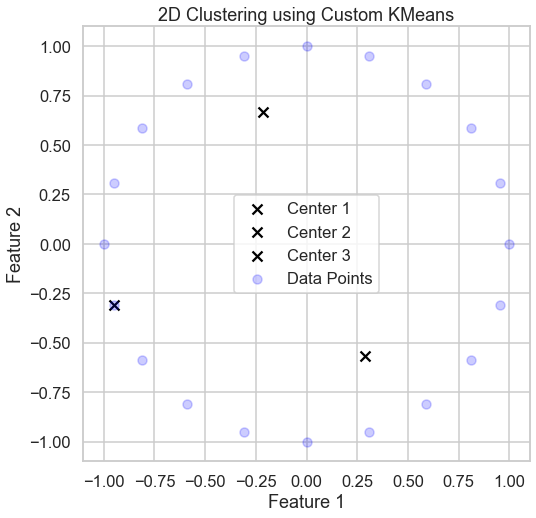

In [10]:
# prepare the figure sise and background 
# this part can be replaced by a number of subplots 
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")
# Produce a data set that represent the x and y o coordinates of a circle 
# this part can be replaced by data that you import froma file 
angle = np.linspace(0,2*np.pi,20, endpoint = False)
X1 = np.append([np.cos(angle)],[np.sin(angle)],0).transpose()
# Number of clusters
num_clusters = 3

# Generate random cluster centroids within the range of data points
# For example, random centroids within the range [-1, 1] for both x and y coordinates
Cluster_Centroids = np.random.uniform(low=-1, high=1, size=(num_clusters, 2))

km1=GUC_Kmean(Cluster_Centroids,X1,"Euclidean")
display_clusters_2d(X1,km1)


> #### 2.3. Example 2 : Multi blob Data Gen and display 

[[ 0.51559865  4.01436706  8.24405505 12.48253759 16.72312906]
 [ 1.65502882  2.77755468  6.97785781 11.21009319 15.44803803]
 [ 0.33113127  4.57377196  8.81641264 13.05905333 17.30169402]
 ...
 [17.98296694 13.74254377  9.5041001   5.27241198  1.12638243]
 [16.33942791 12.10071402  7.86623514  3.65075757  0.88227336]
 [16.33371361 12.09289121  7.85403307  3.62403824  0.76254232]]
17.52100214253117


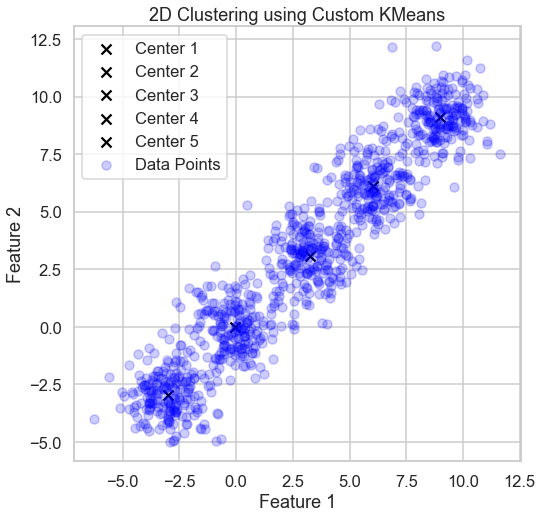

In [11]:
n_samples = 1000
n_bins = 4  
centers = [(-3, -3), (0, 0), (3, 3), (6, 6), (9,9)]
X2, y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.0,
                  centers=centers, shuffle=False, random_state=42)

km2=GUC_Kmean(centers,X2,"Euclidean")
display_clusters_2d(X2,km2)

#### 2.3. Example 3 : moons Data Gen and display 

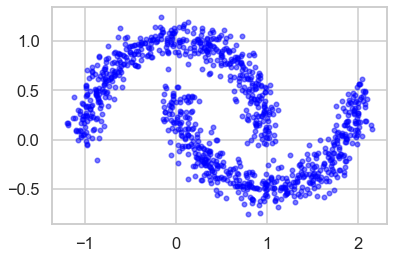

In [12]:
n_samples = 1000
X3, y = noisy_moons = make_moons(n_samples=n_samples, noise= .1)
display_cluster(X3)

## 3. Testing the GUC_Kmean function on Simple 2D
1. Apply the GUC_Kmean fucntion to 2D Data provided by example 1, Example 2 and Example 3
2. Try a varing number of cluster centriods that range from 2 to 10 clusters on each set 
3. Display your results.
4. plot the Cluster perfromance Metric versus the number of clusters
4. Change the distance function and repeat the above steps 

In [16]:
def GUC_Kmean2(Cluster_Centroids, Data_points, Distance_Type):
    if type(Data_points) == pd.DataFrame:
        Data_points = Data_points.values
    while True:
        distance_matrix = GUC_Distance(Cluster_Centroids, Data_points, Distance_Type)
        distance_matrix1 = np.array(distance_matrix)
        min_values = []
        min_indices = []
        for arr in distance_matrix1:
            min_index = np.argmin(arr)
            min_indices.append(min_index)
            min_value = arr[min_index]
            min_values.append(min_value)
        min_values = np.array(min_values)
        min_indices = np.array(min_indices)
        clusters = [[] for _ in range(len(Cluster_Centroids))]
        for i, value in enumerate(min_indices):
            clusters[value].append(Data_points[i])
        new_centroids = []
        mean_square_distances = []
        for cluster in clusters:
            if cluster:
                mean_point = np.mean(cluster, axis=0)
                new_centroids.append(mean_point)
                distances = np.linalg.norm(cluster - mean_point, axis=1)
                mean_square_distance = np.mean(distances ** 2)
                mean_square_distances.append(mean_square_distance)
        if np.array_equal(new_centroids, Cluster_Centroids):
            break
        Cluster_Centroids = new_centroids
        Final_Cluster_Distance = Cluster_Centroids
        Cluster_Metric = np.sum(np.square(mean_square_distances))
        return [Final_Cluster_Distance, Cluster_Metric]


[[1.05648702 1.23790278]
 [1.29553883 1.18528353]
 [1.50291087 1.11606743]
 [1.67341557 1.03446806]
 [1.80281534 0.94637594]
 [1.88790351 0.85976581]
 [1.92657446 0.78494976]
 [1.91787182 0.73383864]
 [1.86201079 0.71687864]
 [1.76037308 0.73806644]
 [1.61547486 0.79245367]
 [1.43090985 0.86918874]
 [1.21127321 0.95644111]
 [0.96208326 1.0441561 ]
 [0.68976859 1.12461491]
 [0.40217433 1.19213626]
 [0.11930932 1.24267453]
 [0.21838393 1.27352541]
 [0.50876289 1.28314891]
 [0.79183993 1.27107988]]


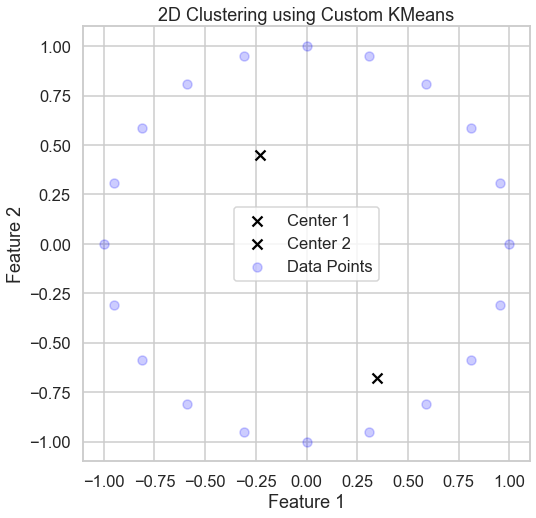

[[1.29932432 0.50623456 1.50978178]
 [1.45197809 0.34669566 1.38985969]
 [1.57098072 0.34025558 1.23877415]
 [1.65295191 0.49339074 1.06154182]
 [1.69563574 0.70048788 0.86518577]
 [1.69787545 0.91286251 0.66077274]
 [1.65961063 1.11256416 0.47077287]
 [1.58187727 1.29016783 0.3530027 ]
 [1.46680964 1.43935689 0.39378761]
 [1.31766126 1.55550111 0.5567935 ]
 [1.13889863 1.63523416 0.75782204]
 [0.93653266 1.67632524 0.96022149]
 [0.7192728  1.67764428 1.14855294]
 [0.50307433 1.6391552  1.31410206]
 [0.33189341 1.56191578 1.45092689]
 [0.3202386  1.44808364 1.55470725]
 [0.480652   1.3009478  1.62237732]
 [0.69498064 1.12504718 1.65200616]
 [0.91312828 0.92656134 1.64276188]
 [1.11763258 0.71461912 1.59490322]]


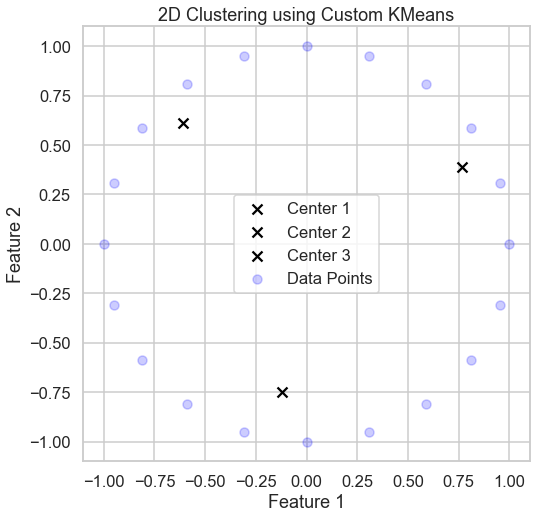

[[1.22596132 1.26681874 1.41951182 1.62503619]
 [0.97460208 1.29302314 1.48986287 1.6932371 ]
 [0.69955505 1.29688714 1.52736483 1.72091864]
 [0.40821503 1.27823019 1.53081467 1.70734256]
 [0.11501206 1.23793382 1.5001031  1.65287045]
 [0.21014059 1.1779917  1.43621112 1.55896259]
 [0.50636511 1.10163555 1.34124457 1.42817849]
 [0.79321577 1.0135719  1.21853698 1.26420355]
 [1.06114331 0.92036922 1.07290971 1.07197493]
 [1.30317829 0.83096292 0.91132333 0.8581444 ]
 [1.51324856 0.75691132 0.74454166 0.63281519]
 [1.68613557 0.71122122 0.59132455 0.4173078 ]
 [1.81756021 0.70415069 0.48632579 0.28219982]
 [1.90427489 0.73747681 0.47535518 0.35521696]
 [1.94413852 0.80328346 0.56484225 0.5560728 ]
 [1.93616717 0.88886445 0.71179612 0.78155827]
 [1.88055756 0.98190813 0.87773521 1.00075166]
 [1.77868241 1.07257468 1.04140469 1.20124397]
 [1.63305763 1.15354451 1.19089078 1.37552442]
 [1.44728321 1.21952658 1.31865306 1.51815212]]


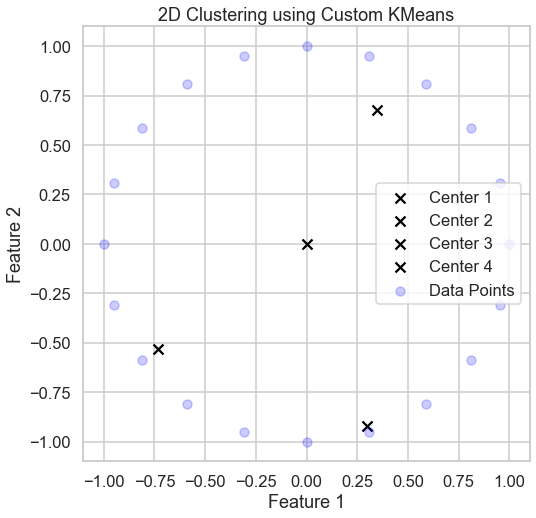

[[1.34632032 0.46754845 0.29383438 1.52935643 1.33042964]
 [1.47738568 0.17186275 0.55452453 1.52437918 1.52616054]
 [1.57456739 0.15194506 0.81649227 1.48546616 1.68456   ]
 [1.63503141 0.4470843  1.06238782 1.41387031 1.8016629 ]
 [1.65706601 0.73662873 1.28386043 1.31198704 1.87455179]
 [1.64005545 1.00883611 1.47468093 1.18348511 1.90141492]
 [1.58447472 1.25648746 1.62981601 1.03363435 1.88158522]
 [1.49189343 1.47334233 1.74528014 0.87012677 1.81555508]
 [1.36499784 1.65400546 1.81814321 0.70517307 1.70496539]
 [1.20766969 1.79400232 1.84656722 0.5606081  1.55257008]
 [1.02523507 1.88987231 1.82983705 0.47546804 1.36218031]
 [0.82523748 1.93924782 1.76837349 0.49119146 1.138601  ]
 [0.62001847 1.94091    1.66372553 0.59865787 0.88760117]
 [0.43629995 1.89481781 1.51854351 0.75231089 0.61610796]
 [0.34324569 1.80210905 1.33654205 0.91852651 0.33411645]
 [0.41701737 1.66507316 1.1224787  1.07905697 0.1009927 ]
 [0.5942434  1.48709723 0.88223695 1.22335644 0.29191655]
 [0.79871105 1

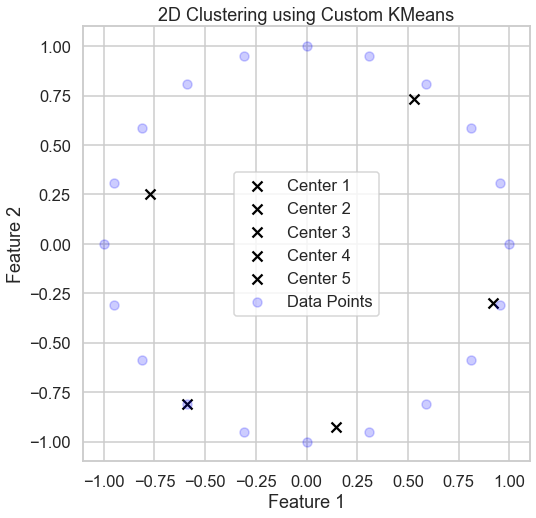

[[1.64115197 0.97234726 1.36983806 1.03128007 0.81775009 0.62242581]
 [1.5108929  0.65965578 1.14143104 1.05729909 0.50529957 0.86015273]
 [1.34446418 0.36820778 0.88526623 1.07777079 0.21617153 1.08395367]
 [1.14641037 0.27582015 0.60808762 1.09104795 0.25167762 1.28456315]
 [0.9225541  0.51231767 0.31875623 1.09610669 0.55094109 1.45560737]
 [0.6807851  0.82250196 0.07383153 1.0925656  0.86243933 1.59221476]
 [0.4350727  1.13033971 0.30119679 1.08069117 1.15803364 1.69068384]
 [0.23538147 1.41672121 0.59081646 1.06139409 1.42716327 1.74841114]
 [0.27371953 1.67134708 0.86902031 1.03621324 1.66221408 1.76388871]
 [0.49591485 1.88669164 1.12665925 1.0072761  1.85699819 1.73671417]
 [0.74275994 2.05686909 1.3569187  0.97721417 2.006528   1.6675945 ]
 [0.98095605 2.17738924 1.55396906 0.94900197 2.10702211 1.55833968]
 [1.19895296 2.24512643 1.7128889  0.92568689 2.15595447 1.41185329]
 [1.38953783 2.25833852 1.82973061 0.91000026 2.15209856 1.23214561]
 [1.54724466 2.21668677 1.9015991 

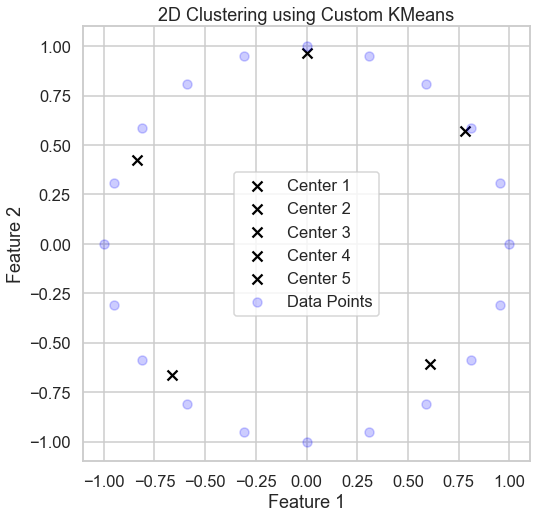

[[1.13732388 0.78616073 1.16892267 1.27642067 0.50094569 1.76800881
  1.52558519]
 [1.24152691 1.03719795 1.15327123 1.12645882 0.70298876 1.70376203
  1.34644389]
 [1.32406434 1.26429403 1.12439424 0.95657434 0.91142604 1.59827641
  1.13502453]
 [1.38132155 1.46111825 1.08420572 0.776057   1.10793495 1.45430333
  0.89714731]
 [1.41100484 1.62251404 1.03558773 0.60101212 1.2828939  1.27567921
  0.64031887]
 [1.41198063 1.74435612 0.98243084 0.46420183 1.4299099  1.06737946
  0.37727668]
 [1.38421222 1.82356523 0.92961699 0.42347733 1.54433051 0.83582126
  0.1675204 ]
 [1.32875795 1.85815052 0.88282446 0.50626411 1.62279007 0.59024673
  0.27994717]
 [1.24782957 1.8472449  0.84796571 0.66246498 1.66306673 0.35065876
  0.53696859]
 [1.14494438 1.79112164 0.83011687 0.84210013 1.66404089 0.21065352
  0.79837635]
 [1.02525732 1.69118912 0.8321391  1.02013016 1.62568562 0.34687725
  1.04470554]
 [0.89625281 1.54996444 0.85369851 1.18364091 1.54906653 0.58598116
  1.26724453]
 [0.76909805 1.3

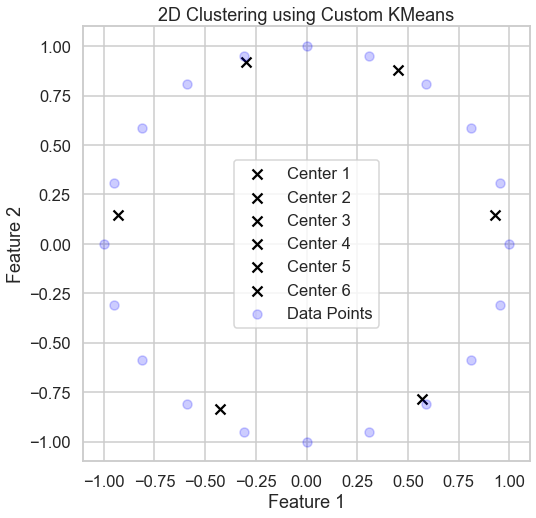

[[1.19856801 0.92111918 0.32726203 0.90502578 0.37734274 1.14397307
  2.03448128 1.4186882 ]
 [1.43058801 0.62037773 0.5493848  1.0682669  0.58972535 1.39212207
  2.11558102 1.43109702]
 [1.62739409 0.30775423 0.78882267 1.21566355 0.81800465 1.60602697
  2.14484116 1.41386419]
 [1.78413631 0.07997152 1.01832625 1.3401678  1.03682104 1.78040837
  2.12153083 1.36762388]
 [1.89695321 0.35855539 1.22697465 1.43689977 1.23517034 1.9109664
  2.04623224 1.29413215]
 [1.96306581 0.67026392 1.40777078 1.50247663 1.40604507 1.99448312
  1.92082875 1.19637332]
 [1.98084572 0.9680285  1.55544691 1.53474648 1.54427029 2.02890048
  1.74846798 1.07880526]
 [1.94985502 1.24269326 1.66595957 1.53268365 1.64594977 2.01337043
  1.53350771 0.94789065]
 [1.870857   1.48709051 1.73637233 1.49635312 1.70831787 1.94827563
  1.28146738 0.81320879]
 [1.74579749 1.69506006 1.76484199 1.42691252 1.72970828 1.8352201
  0.9990636  0.68954623]
 [1.5777571  1.86141805 1.75062823 1.32665354 1.70955383 1.67699011
  0.

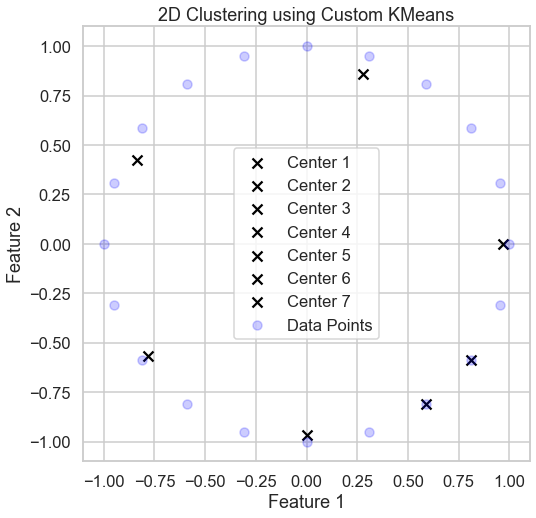

[[1.23385662 1.34326356 1.00472963 1.27028159 1.63072739 1.20015619
  0.28905822 1.33162298 1.12824893]
 [1.40690032 1.24793595 0.79148535 1.16752732 1.47432043 1.35342666
  0.13192719 1.35493679 1.3301352 ]
 [1.5471726  1.12984053 0.57272417 1.04646596 1.28220428 1.47694629
  0.34917925 1.35246006 1.50072153]
 [1.65074648 0.99470123 0.3786639  0.91420169 1.05942975 1.56683528
  0.6220028  1.32429592 1.6353568 ]
 [1.71482038 0.85095306 0.30106766 0.78136155 0.81222829 1.62042865
  0.88676519 1.27163975 1.73049399]
 [1.73769077 0.71174553 0.41826085 0.66439627 0.54891534 1.63618405
  1.13190936 1.19685108 1.78366834]
 [1.71875408 0.59842004 0.62292508 0.58737324 0.28680046 1.61365363
  1.35020199 1.10362388 1.79351338]
 [1.65850992 0.54150666 0.8420589  0.57508124 0.15490846 1.55347857
  1.53583677 0.99732673 1.75977686]
 [1.5585583  0.56418175 1.05195074 0.6324195  0.36364423 1.45739723
  1.68404972 0.88562858 1.68332413]
 [1.4215969  0.6564047  1.24166558 0.73887617 0.62958769 1.32828

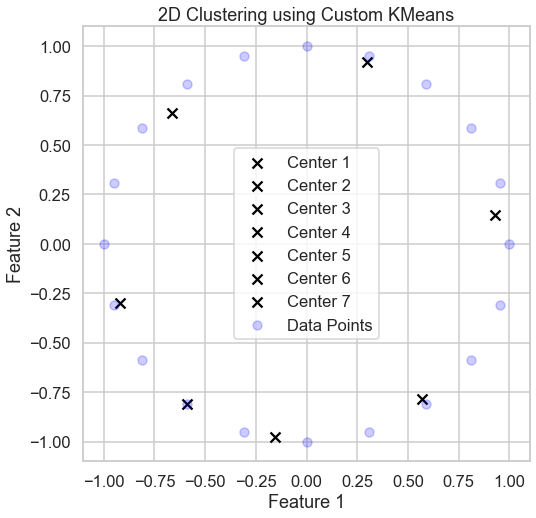

[[0.49213223 0.99138152 0.47407081 1.94948422 1.53514739 0.63679944
  2.07915842 1.46552966 0.48119935 2.00420272]
 [0.70396156 1.03476033 0.37425736 1.97166749 1.71088227 0.45903974
  1.9231539  1.25304212 0.27450401 2.03107093]
 [0.91944077 1.0740715  0.42221888 1.94531182 1.84450069 0.36452865
  1.72084141 1.00998504 0.2604868  2.00793923]
 [1.12132988 1.10608516 0.5793138  1.87106659 1.93271022 0.42382029
  1.4776289  0.74262042 0.458028   1.93537763]
 [1.30048439 1.12839768 0.7724471  1.7507613  1.97333768 0.58853167
  1.20039327 0.45850716 0.69804554 1.81517428]
 [1.45070226 1.13943848 0.96743143 1.58736091 1.9653822  0.78536394
  0.89813207 0.17235288 0.93441194 1.65029196]
 [1.56740502 1.13845932 1.14897501 1.38489396 1.90903978 0.98205569
  0.58529374 0.1660905  1.15307998 1.44479627]
 [1.64725408 1.12552581 1.30832885 1.14835611 1.80569842 1.16415246
  0.30684407 0.45174982 1.34610129 1.20375852]
 [1.6880383  1.10151827 1.43956082 0.88359543 1.6579042  1.32325104
  0.29276513

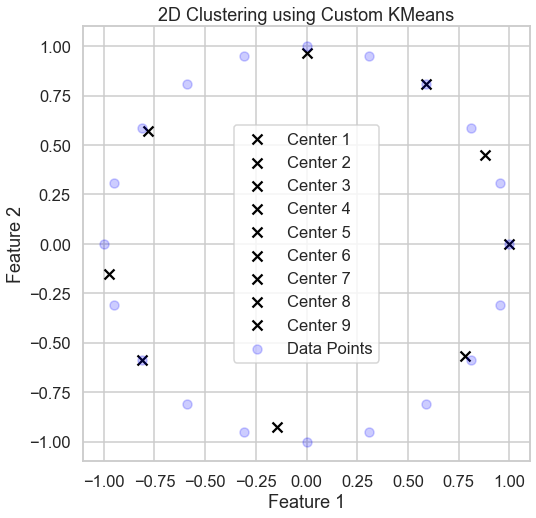

In [17]:
# prepare the figure sise and background 
# this part can be replaced by a number of subplots 
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")
# Produce a data set that represent the x and y o coordinates of a circle 
# this part can be replaced by data that you import froma file 
angle = np.linspace(0,2*np.pi,20, endpoint = False)
X1 = np.append([np.cos(angle)],[np.sin(angle)],0).transpose()
for num_clusters in range(2, 11):


    # Generate random cluster centroids within the range of data points
    # For example, random centroids within the range [-1, 1] for both x and y coordinates
    Cluster_Centroids = np.random.uniform(low=-1, high=1, size=(num_clusters, 2))

    km1=GUC_Kmean2(Cluster_Centroids,X1,"Euclidean")
    display_clusters_2d(X1,km1)


[[1.27185845 0.73053107]
 [1.42113973 0.44981035]
 [1.53808108 0.17204483]
 [1.61923298 0.17998292]
 [1.66229465 0.45873642]
 [1.66606882 0.73912575]
 [1.63045124 1.00355373]
 [1.55643009 1.2440945 ]
 [1.44609358 1.45441992]
 [1.30266499 1.62919038]
 [1.1306259  1.76402649]
 [0.93610935 1.85556884]
 [0.72817954 1.90154297]
 [0.52347243 1.90080805]
 [0.36430117 1.85338231]
 [0.3466317  1.76044262]
 [0.48740906 1.62429831]
 [0.68808736 1.4483418 ]
 [0.89707982 1.23698334]
 [1.09498985 0.99559219]]
[[1.0616437  1.19102314 0.11791358]
 [0.99641624 1.21447374 0.41211663]
 [0.92941579 1.22050615 0.70360069]
 [0.8675385  1.20878645 0.97862704]
 [0.81863144 1.17996678 1.22984668]
 [0.79024628 1.13571338 1.45092419]
 [0.78745705 1.07877971 1.63635932]
 [0.81079374 1.01312656 1.78155996]
 [0.85599756 0.94406992 1.88293747]
 [0.91583258 0.87836415 1.93798862]
 [0.98237529 0.82396209 1.94535468]
 [1.04847663 0.78898871 1.90485389]
 [1.10830269 0.77962451 1.81748577]
 [1.15737872 0.79767472 1.68540

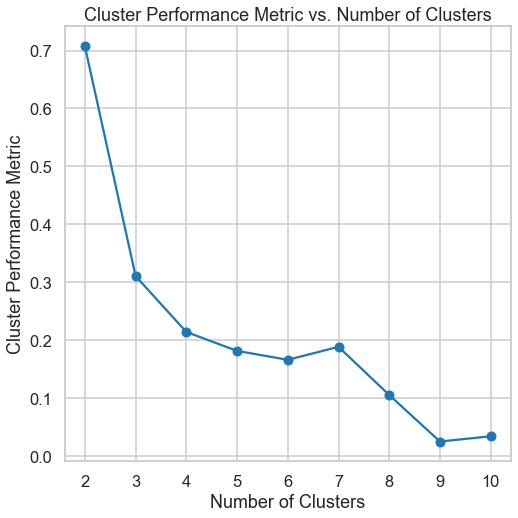

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Function to calculate the GUC_Kmean and return the cluster performance metric
def calculate_cluster_metric(num_clusters, data):
    # Generate random cluster centroids within the range of data points
    centroids = np.random.uniform(low=-1, high=1, size=(num_clusters, 2))
    
    # Apply GUC_Kmean function
    # (Assuming GUC_Kmean returns centroids and cluster_metric)
    centroids, cluster_metric = GUC_Kmean2(centroids, data, "Euclidean")
    
    return cluster_metric

# Prepare the figure size and background
plt.rcParams['figure.figsize'] = [8, 8]
sns.set_style("whitegrid")
sns.set_context("talk")

# Produce a data set (X1) representing the x and y coordinates of a circle
angle = np.linspace(0, 2*np.pi, 20, endpoint=False)
X1 = np.append([np.cos(angle)], [np.sin(angle)], axis=0).T

# Range of number of clusters
num_clusters_range = range(2, 11)

# Collect cluster performance metrics for each number of clusters
cluster_metrics = [calculate_cluster_metric(num_clusters, X1) for num_clusters in num_clusters_range]

# Plot the Cluster Performance Metric versus the number of clusters
plt.plot(num_clusters_range, cluster_metrics, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Cluster Performance Metric')
plt.title('Cluster Performance Metric vs. Number of Clusters')
plt.show()


[[ 0.51559865  4.01436706  8.24405505 12.48253759 16.72312906]
 [ 1.65502882  2.77755468  6.97785781 11.21009319 15.44803803]
 [ 0.33113127  4.57377196  8.81641264 13.05905333 17.30169402]
 ...
 [17.98296694 13.74254377  9.5041001   5.27241198  1.12638243]
 [16.33942791 12.10071402  7.86623514  3.65075757  0.88227336]
 [16.33371361 12.09289121  7.85403307  3.62403824  0.76254232]]
17.52100214253117


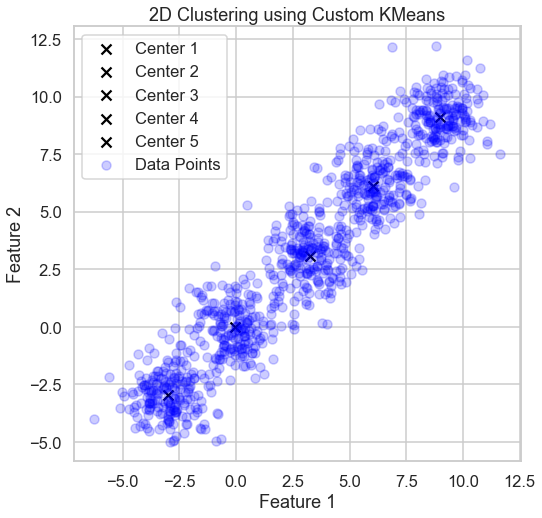

In [ ]:
n_samples = 1000
n_bins = 4  
centers = [(-3, -3), (0, 0), (3, 3), (6, 6), (9,9)]
X2, y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.0,
                  centers=centers, shuffle=False, random_state=42)

km2=GUC_Kmean(centers,X2,"Euclidean")
display_clusters_2d(X2,km2)

## 4. Using the GUC_Kmean function to segment customers int he provided customer dataset
1. Apply the GUC_Kmean fucntion to customer data  
2. Try a varing number of cluster that range from 2 to 10 cluster on each set 
3. Display your results.
4. plot the Cluster Metric versus the number of clusters
4. Change the distance function and repeat the above steps 

In [ ]:
import pandas as pd
data = pd.read_csv(r"C:/Users/yomna/Downloads/kmeans/Customer data.csv")
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans



def test(data, num_clusters_range, Distance_Type, Cluster_Centroids):
    for idx, df in enumerate(data):
        for num_clusters in num_clusters_range:
            # Apply GUC_Kmean function
            GUC_Kmean_result = GUC_Kmean(Cluster_Centroids, df, Distance_Type)
            
            # Display clusters using the display_cluster function
            display_cluster1(df.values, GUC_Kmean_result, num_clusters=num_clusters)
            
            # Plot the results
            plt.title(f'Example {idx + 1} - {num_clusters} Clusters')
            plt.show()

# Varying number of cluster centroids from 2 to 10
num_clusters_range = range(2, 11)
centroids = np.array([[4, 0], [6, 5]])

# Assuming data is a list of DataFrames
test(data, num_clusters_range, "Euclidean", centroids)





TypeError: iteration over a 0-d array